## Here’s a full workflow for using the Iris dataset 
with Support Vector Machine (SVM), including preprocessing with a pipeline, hyperparameter tuning via GridSearchCV, and testing with evaluation metrics.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


## Step 2: Load the Iris Dataset

In [2]:
# Load iris dataset
iris = sns.load_dataset("iris")

# Features and target
X = iris.drop("species", axis=1)
y = iris["species"]
print(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


## Step 3: Create Pipeline

In [3]:
# Pipeline: StandardScaler + SVM Classifier
pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm", SVC(random_state=42))
])


## Step 4: Hyperparameter Tuning with GridSearchCV

In [4]:
# Define parameter grid for SVM
param_grid = {
    "svm__kernel": ["linear", "rbf", "poly"],
    "svm__C": [0.1, 1, 10],
    "svm__gamma": ["scale", "auto"]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best CV Score: 0.9714285714285715


## Step 5: Testing the Optimized Model

In [5]:
# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", best_model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


## Step 6: Visualize Decision Boundaries (Optional)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


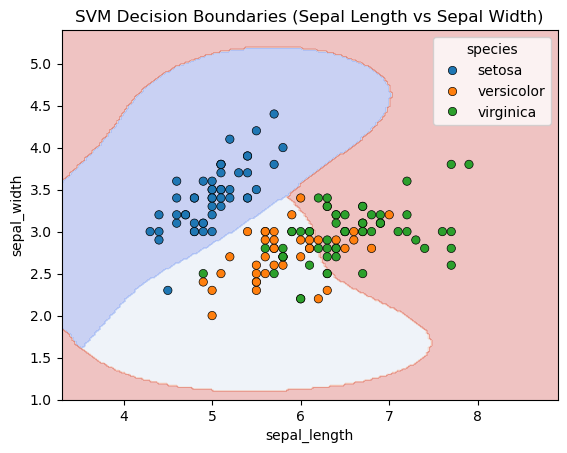

In [6]:
import numpy as np

# Select two features for visualization
X_vis = iris[["sepal_length", "sepal_width"]]
y_vis = iris["species"]

# Train SVM on two features
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1, gamma="scale"))
])
svm_model.fit(X_vis, y_vis)

# Create meshgrid
x_min, x_max = X_vis.iloc[:,0].min()-1, X_vis.iloc[:,0].max()+1
y_min, y_max = X_vis.iloc[:,1].min()-1, X_vis.iloc[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Categorical(Z).codes.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris, edgecolor="k")
plt.title("SVM Decision Boundaries (Sepal Length vs Sepal Width)")
plt.show()


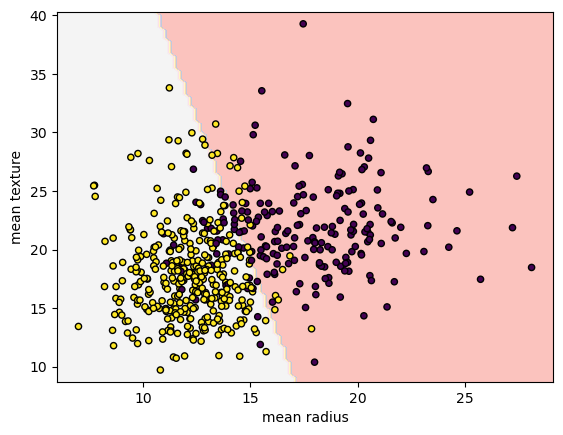

In [7]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()